In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

### Import SPARSE.csv

In [2]:
df_SPARSE = pd.read_csv("combinedResults(SPARSE).csv")
df_SPARSE

,Vertices,Edges,Time Array (Method 1),Time Array (Method 2),Density,Matrix Memory (bytes),List Memory (bytes)
0,197,196,30874,5190,0.010152,155236,2352
1,926,925,20191,4942,0.002160,3429904,11100
2,258,257,30843,14631,0.007752,266256,3084
3,783,782,2447,503,0.002554,2452356,9384
4,857,856,18603,2380,0.002334,2937796,10272
...,...,...,...,...,...,...,...
995,188,187,10158,1440,0.010638,141376,2244
996,100,99,238,69,0.020000,40000,1188
997,880,879,1707,191,0.002273,3097600,10548
998,784,783,1535,179,0.002551,2458624,9396


### Import Dense.csv

In [3]:
df_dense = pd.read_csv("combinedResults.csv")
df_dense

,Vertices,Edges,Time Array (Method 1),Time Array (Method 2),Density,Matrix Memory (bytes),List Memory (bytes)
0,867,587633,3548064,7383804,1.565306,3006756,7051596
1,854,711065,2049871,13089047,1.952236,2917264,8532780
2,755,350427,2957553,9564427,1.231145,2280100,4205124
3,13,11,315,501,0.141026,676,132
4,690,140721,2238295,2937943,0.591998,1904400,1688652
...,...,...,...,...,...,...,...
995,770,297594,3078743,3622076,1.005164,2371600,3571128
996,814,221329,3281078,3229495,0.668888,2650384,2655948
997,744,71881,2883742,1825822,0.260065,2214144,862572
998,275,74061,237728,968298,1.965786,302500,888732


Method1: Adjacency matrix & Array for priority queue <br>
Method2: Adjacency lists & Minimizing heap for priority queue <br><br>
### Separating Data

In [4]:
method1_df_SPARSE = df_SPARSE[['Vertices','Edges','Time Array (Method 1)']].copy()
method1_df_SPARSE

,Vertices,Edges,Time Array (Method 1)
0,197,196,30874
1,926,925,20191
2,258,257,30843
3,783,782,2447
4,857,856,18603
...,...,...,...
995,188,187,10158
996,100,99,238
997,880,879,1707
998,784,783,1535


In [5]:
method2_df_SPARSE = df_SPARSE[['Vertices','Edges','Time Array (Method 2)']].copy()
method2_df_SPARSE

,Vertices,Edges,Time Array (Method 2)
0,197,196,5190
1,926,925,4942
2,258,257,14631
3,783,782,503
4,857,856,2380
...,...,...,...
995,188,187,1440
996,100,99,69
997,880,879,191
998,784,783,179


In [6]:
method1_df_dense = df_dense[['Vertices','Edges','Time Array (Method 1)']].copy()
method1_df_dense

,Vertices,Edges,Time Array (Method 1)
0,867,587633,3548064
1,854,711065,2049871
2,755,350427,2957553
3,13,11,315
4,690,140721,2238295
...,...,...,...
995,770,297594,3078743
996,814,221329,3281078
997,744,71881,2883742
998,275,74061,237728


In [7]:
method2_df_dense = df_dense[['Vertices','Edges','Time Array (Method 2)']].copy()
method2_df_dense

,Vertices,Edges,Time Array (Method 2)
0,867,587633,7383804
1,854,711065,13089047
2,755,350427,9564427
3,13,11,501
4,690,140721,2937943
...,...,...,...
995,770,297594,3622076
996,814,221329,3229495
997,744,71881,1825822
998,275,74061,968298


### Plot Graphs for Method 1
1. Time complexity with respect to Vertices
2. Time complexity with respect to Edges

#### SPARSE Dataset

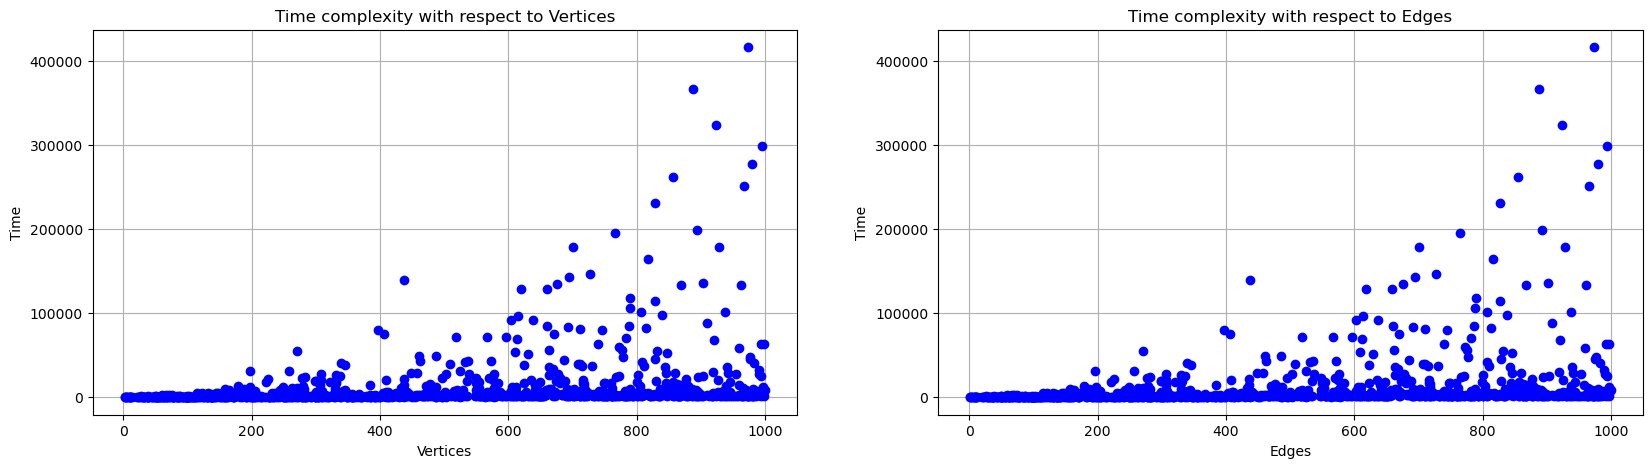

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method1_df_SPARSE['Vertices'], method1_df_SPARSE['Time Array (Method 1)'], 'o', color='b')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method1_df_SPARSE['Edges'], method1_df_SPARSE['Time Array (Method 1)'], 'o', color='b')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.show()

###### Fit a line to the graph

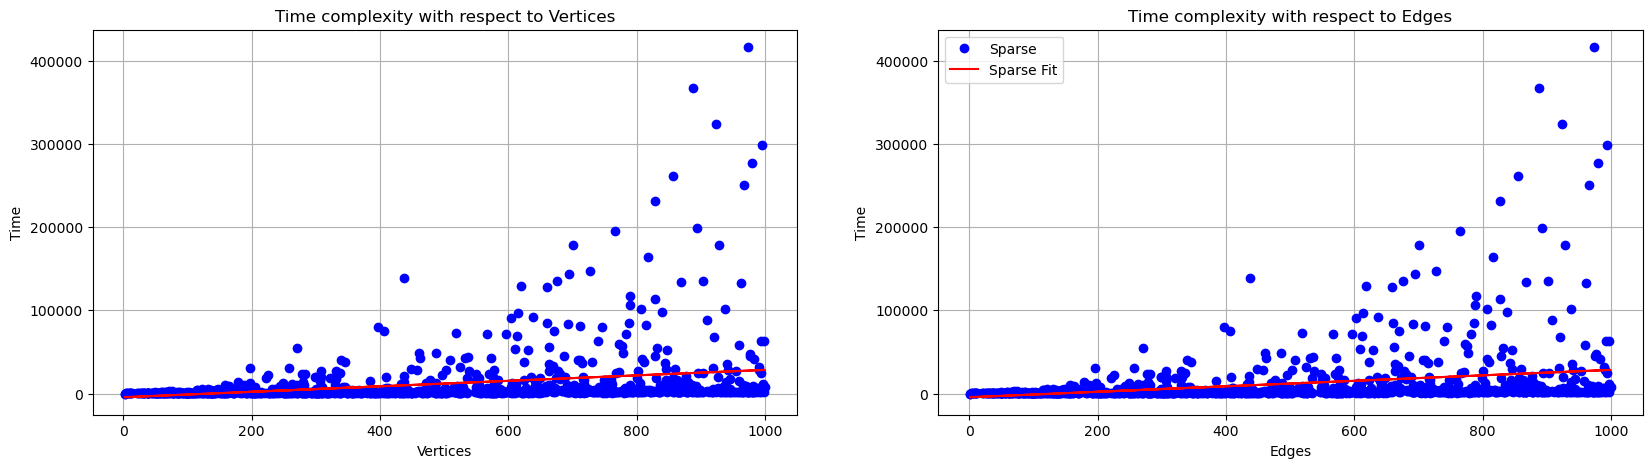

In [9]:
sparse_fit_vertices1 = np.polyfit(method1_df_SPARSE['Vertices'], method1_df_SPARSE['Time Array (Method 1)'], 1)
sparse_fit_edges1 = np.polyfit(method1_df_SPARSE['Edges'], method1_df_SPARSE['Time Array (Method 1)'], 1)

# Define the fitted line equations
sparse_line_vertices1 = np.polyval(sparse_fit_vertices1, method1_df_SPARSE['Vertices'])
sparse_line_edges1 = np.polyval(sparse_fit_edges1, method1_df_SPARSE['Edges'])

fig, ax = plt.subplots(1,2, figsize=(20, 5))

# Plot for Vertices
ax[0].plot(method1_df_SPARSE['Vertices'], method1_df_SPARSE['Time Array (Method 1)'], 'o', color='b', label='Sparse')
ax[0].plot(method1_df_SPARSE['Vertices'], sparse_line_vertices1, '-', color='r', label='Sparse Fit')
ax[0].set_title('Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

# Plot for Edges
ax[1].plot(method1_df_SPARSE['Edges'], method1_df_SPARSE['Time Array (Method 1)'], 'o', color='b', label='Sparse')
ax[1].plot(method1_df_SPARSE['Edges'], sparse_line_edges1, '-', color='r', label='Sparse Fit')
ax[1].set_title('Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.legend()
plt.show()


In [10]:
def remove_outliers(df, column_name):
    Q1 = np.percentile(df[column_name],25)
    Q3 = np.percentile(df[column_name],75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[column_name]>=lower_bound)&(df[column_name]<= upper_bound)]

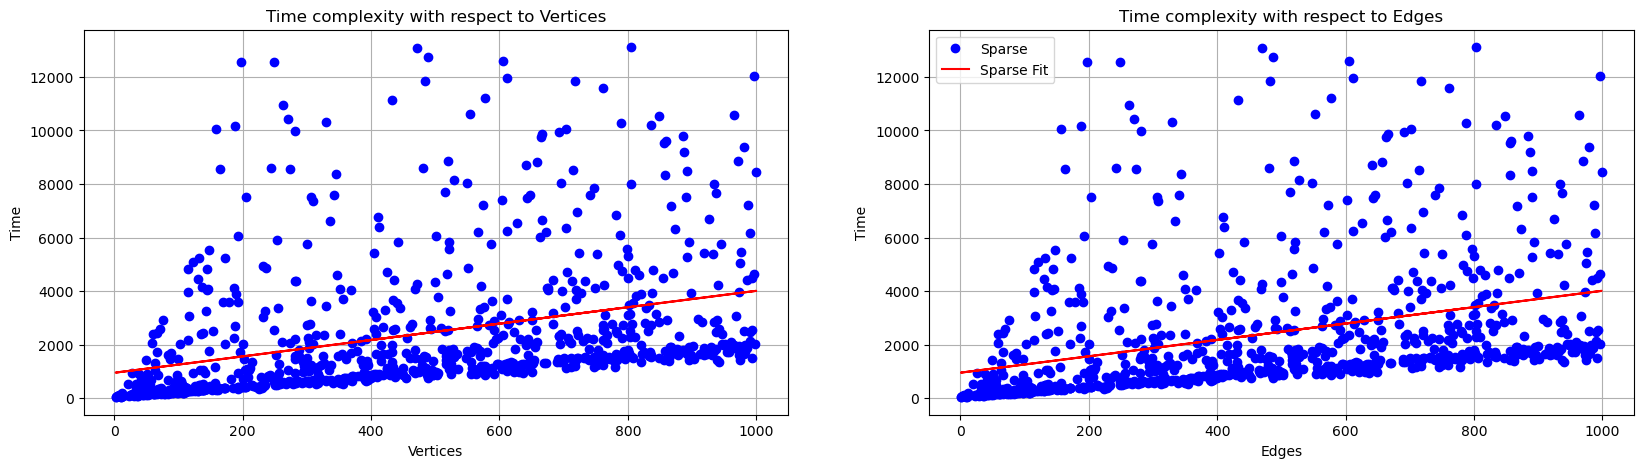

In [11]:
method1_df_SPARSE_filtered = remove_outliers(method1_df_SPARSE,'Time Array (Method 1)')

sparse_fit_vertices1 = np.polyfit(method1_df_SPARSE_filtered['Vertices'], method1_df_SPARSE_filtered['Time Array (Method 1)'], 1)
sparse_fit_edges1 = np.polyfit(method1_df_SPARSE_filtered['Edges'], method1_df_SPARSE_filtered['Time Array (Method 1)'], 1)

# Define the fitted line equations
sparse_line_vertices1 = np.polyval(sparse_fit_vertices1, method1_df_SPARSE_filtered['Vertices'])
sparse_line_edges1 = np.polyval(sparse_fit_edges1, method1_df_SPARSE_filtered['Edges'])

fig, ax = plt.subplots(1,2, figsize=(20, 5))

# Plot for Vertices
ax[0].plot(method1_df_SPARSE_filtered['Vertices'], method1_df_SPARSE_filtered['Time Array (Method 1)'], 'o', color='b', label='Sparse')
ax[0].plot(method1_df_SPARSE_filtered['Vertices'], sparse_line_vertices1, '-', color='r', label='Sparse Fit')
ax[0].set_title('Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

# Plot for Edges
ax[1].plot(method1_df_SPARSE_filtered['Edges'], method1_df_SPARSE_filtered['Time Array (Method 1)'], 'o', color='b', label='Sparse')
ax[1].plot(method1_df_SPARSE_filtered['Edges'], sparse_line_edges1, '-', color='r', label='Sparse Fit')
ax[1].set_title('Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.legend()
plt.show()

#### Dense Dataset

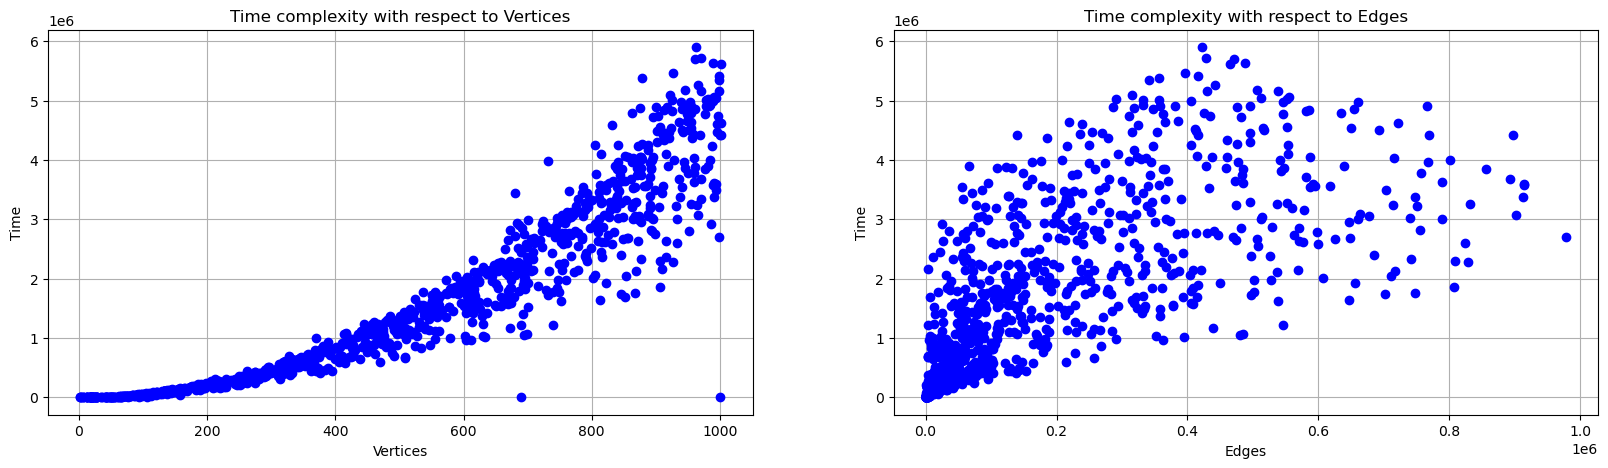

In [12]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method1_df_dense['Vertices'], method1_df_dense['Time Array (Method 1)'], 'o', color='b')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method1_df_dense['Edges'], method1_df_dense['Time Array (Method 1)'], 'o', color='b')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.show()

###### Fit a line to the graph

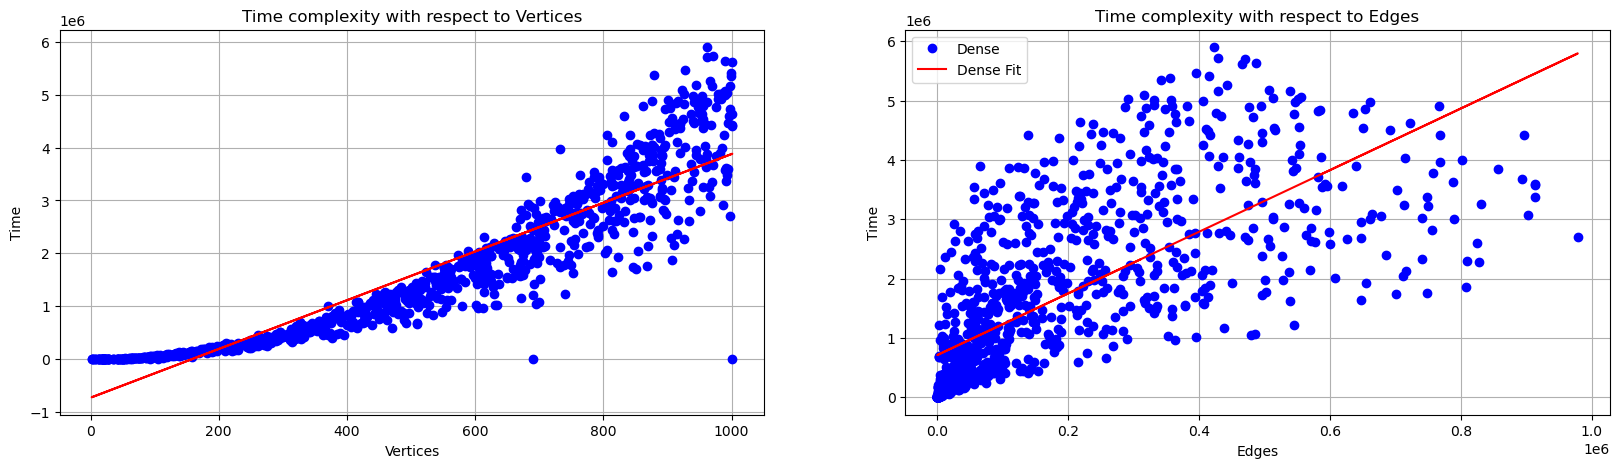

In [13]:
dense_fit_vertices1 = np.polyfit(method1_df_dense['Vertices'], method1_df_dense['Time Array (Method 1)'], 1)
dense_fit_edges1 = np.polyfit(method1_df_dense['Edges'], method1_df_dense['Time Array (Method 1)'], 1)

# Define the fitted line equations
dense_line_vertices1 = np.polyval(dense_fit_vertices1, method1_df_dense['Vertices'])
dense_line_edges1 = np.polyval(dense_fit_edges1, method1_df_dense['Edges'])

fig, ax = plt.subplots(1,2, figsize=(20, 5))

# Plot for Vertices
ax[0].plot(method1_df_dense['Vertices'], method1_df_dense['Time Array (Method 1)'], 'o', color='b', label='Dense')
ax[0].plot(method1_df_dense['Vertices'], dense_line_vertices1, '-', color='r', label='Dense Fit')
ax[0].set_title('Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

# Plot for Edges
ax[1].plot(method1_df_dense['Edges'], method1_df_dense['Time Array (Method 1)'], 'o', color='b', label='Dense')
ax[1].plot(method1_df_dense['Edges'], dense_line_edges1, '-', color='r', label='Dense Fit')
ax[1].set_title('Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.legend()
plt.show()


#### SPARSE and Dense Combined

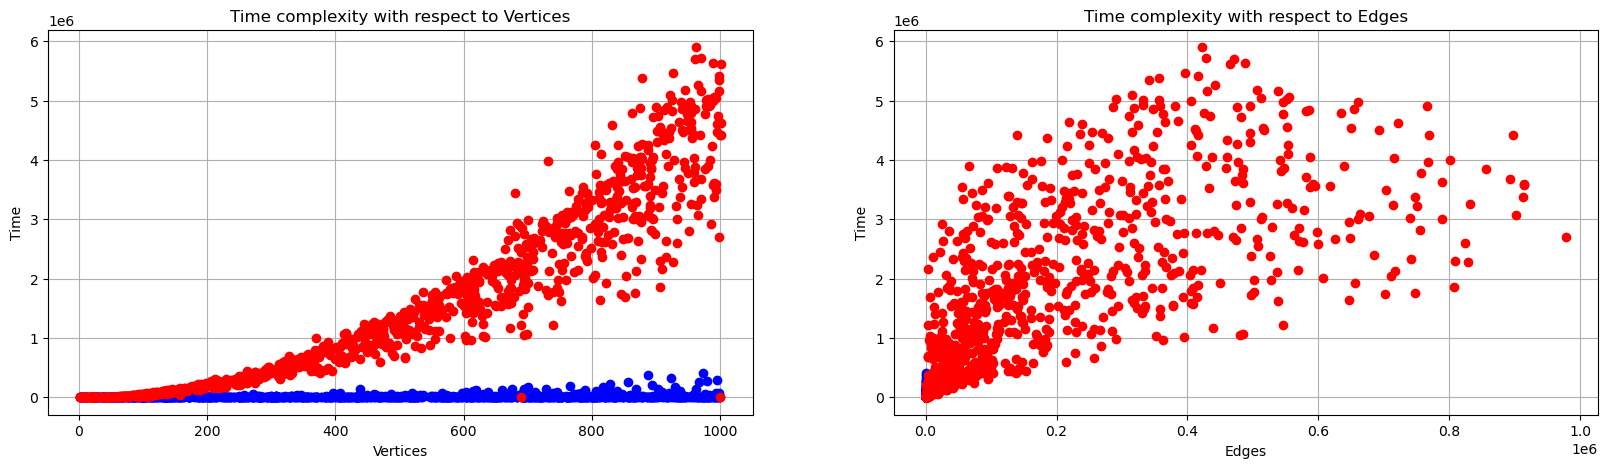

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method1_df_SPARSE['Vertices'], method1_df_SPARSE['Time Array (Method 1)'], 'o', color='b')
ax[0].plot(method1_df_dense['Vertices'], method1_df_dense['Time Array (Method 1)'], 'o', color='r')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method1_df_SPARSE['Edges'], method1_df_SPARSE['Time Array (Method 1)'], 'o', color='b')
ax[1].plot(method1_df_dense['Edges'], method1_df_dense['Time Array (Method 1)'], 'o', color='r')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.show()

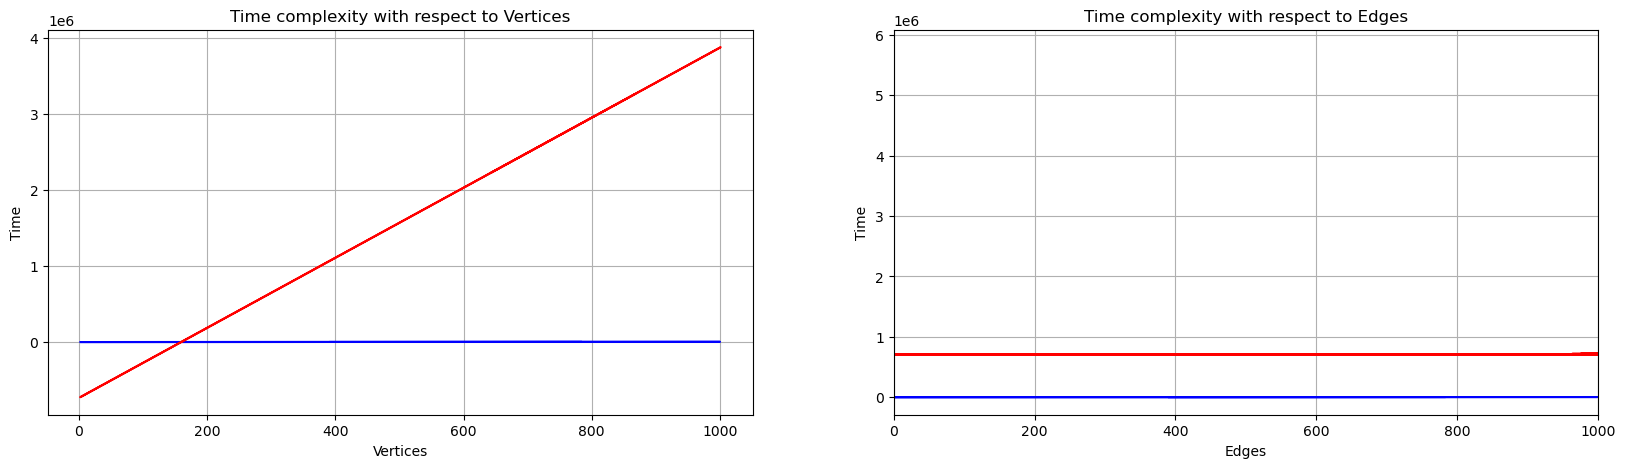

In [15]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method1_df_SPARSE_filtered['Vertices'], sparse_line_vertices1, '-', color='b', label='Sparse Fit')
ax[0].plot(method1_df_dense['Vertices'], dense_line_vertices1, '-', color='r', label='Dense Fit')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method1_df_SPARSE_filtered['Edges'], sparse_line_edges1, '-', color='b', label='Sparse Fit')
ax[1].plot(method1_df_dense['Edges'], dense_line_edges1, '-', color='r', label='Dense Fit')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

#set x range to see differences in Edges graph
plt.xlim([0,1000])
plt.show()

### Plot Graphs for Method 2
1. Time complexity with respect to Vertices
2. Time complexity with respect to Edges

#### SPARSE Dataset

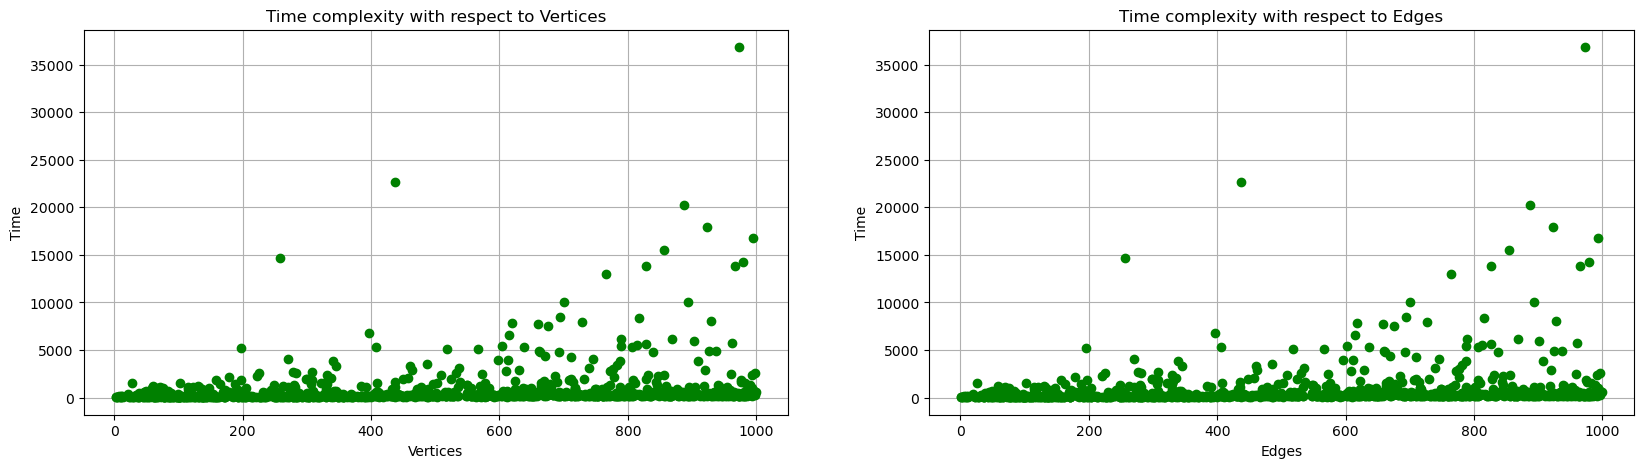

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method2_df_SPARSE['Vertices'], method2_df_SPARSE['Time Array (Method 2)'], 'o', color='g')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method2_df_SPARSE['Edges'], method2_df_SPARSE['Time Array (Method 2)'], 'o', color='g')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.show()

###### Fit a line to the graph

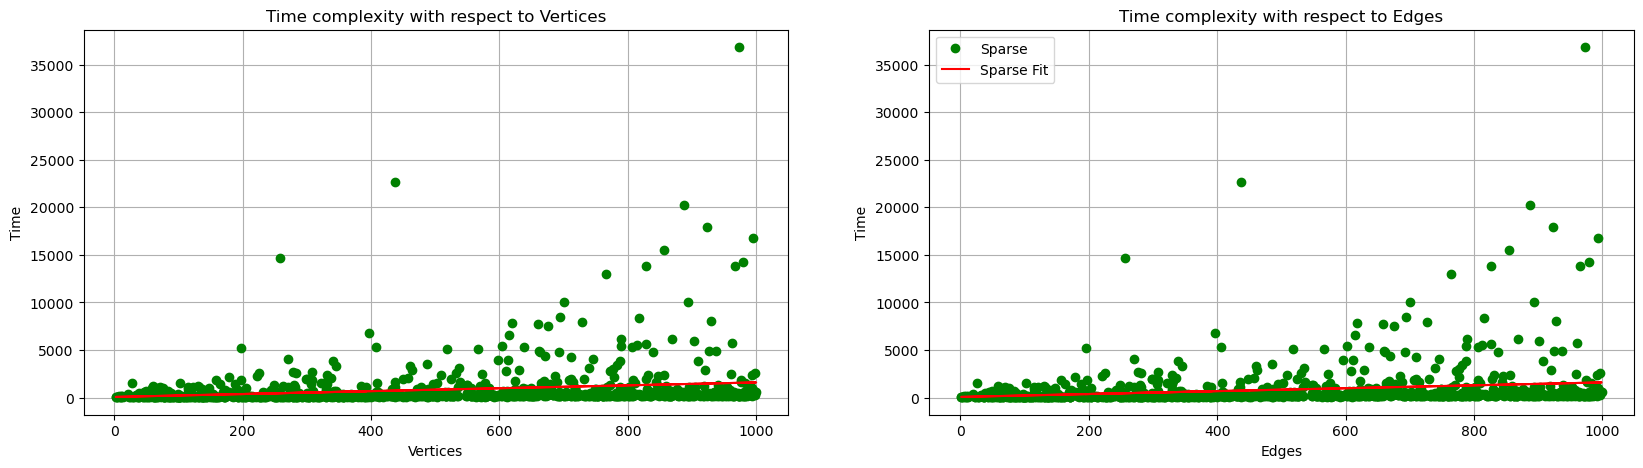

In [17]:
sparse_fit_vertices2 = np.polyfit(method2_df_SPARSE['Vertices'], method2_df_SPARSE['Time Array (Method 2)'], 1)
sparse_fit_edges2 = np.polyfit(method2_df_SPARSE['Edges'], method2_df_SPARSE['Time Array (Method 2)'], 1)

# Define the fitted line equations
sparse_line_vertices2 = np.polyval(sparse_fit_vertices2, method2_df_SPARSE['Vertices'])
sparse_line_edges2 = np.polyval(sparse_fit_edges2, method2_df_SPARSE['Edges'])

fig, ax = plt.subplots(1,2, figsize=(20, 5))

# Plot for Vertices
ax[0].plot(method2_df_SPARSE['Vertices'], method2_df_SPARSE['Time Array (Method 2)'], 'o', color='g', label='Sparse')
ax[0].plot(method2_df_SPARSE['Vertices'], sparse_line_vertices2, '-', color='r', label='Sparse Fit')
ax[0].set_title('Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

# Plot for Edges
ax[1].plot(method2_df_SPARSE['Edges'], method2_df_SPARSE['Time Array (Method 2)'], 'o', color='g', label='Sparse')
ax[1].plot(method2_df_SPARSE['Edges'], sparse_line_edges2, '-', color='r', label='Sparse Fit')
ax[1].set_title('Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.legend()
plt.show()

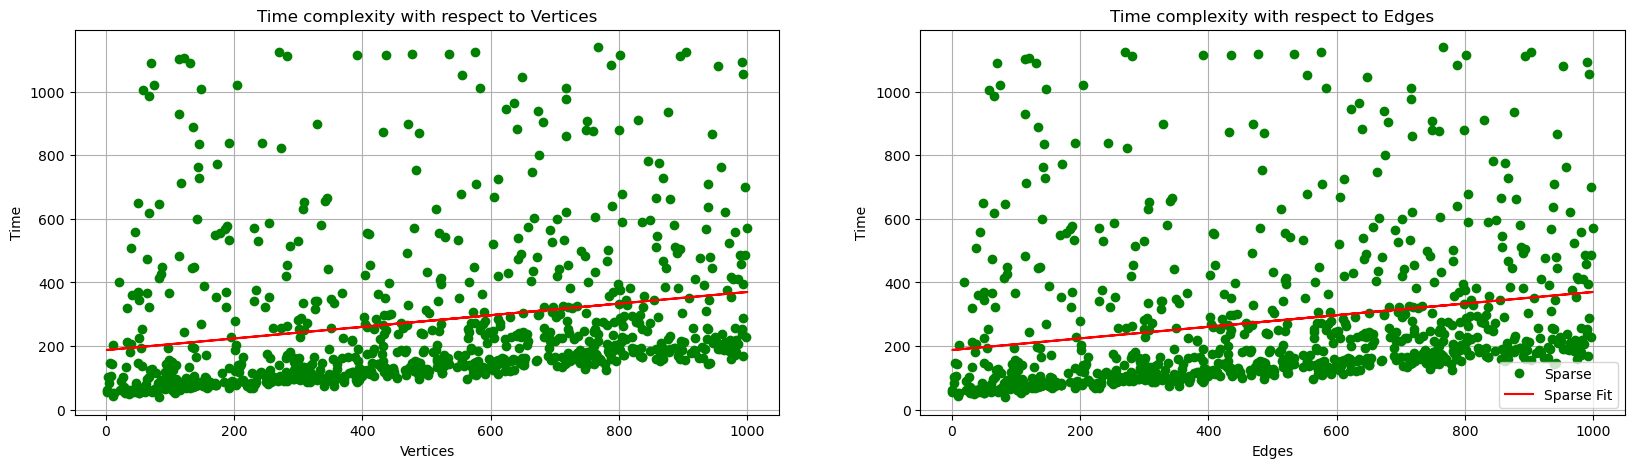

In [18]:
method2_df_SPARSE_filtered = remove_outliers(method2_df_SPARSE,'Time Array (Method 2)')

sparse_fit_vertices2 = np.polyfit(method2_df_SPARSE_filtered['Vertices'], method2_df_SPARSE_filtered['Time Array (Method 2)'], 1)
sparse_fit_edges2 = np.polyfit(method2_df_SPARSE_filtered['Edges'], method2_df_SPARSE_filtered['Time Array (Method 2)'], 1)

# Define the fitted line equations
sparse_line_vertices2 = np.polyval(sparse_fit_vertices2, method2_df_SPARSE_filtered['Vertices'])
sparse_line_edges2 = np.polyval(sparse_fit_edges2, method2_df_SPARSE_filtered['Edges'])

fig, ax = plt.subplots(1,2, figsize=(20, 5))

# Plot for Vertices
ax[0].plot(method2_df_SPARSE_filtered['Vertices'], method2_df_SPARSE_filtered['Time Array (Method 2)'], 'o', color='g', label='Sparse')
ax[0].plot(method2_df_SPARSE_filtered['Vertices'], sparse_line_vertices2, '-', color='r', label='Sparse Fit')
ax[0].set_title('Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

# Plot for Edges
ax[1].plot(method2_df_SPARSE_filtered['Edges'], method2_df_SPARSE_filtered['Time Array (Method 2)'], 'o', color='g', label='Sparse')
ax[1].plot(method2_df_SPARSE_filtered['Edges'], sparse_line_edges2, '-', color='r', label='Sparse Fit')
ax[1].set_title('Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.legend()
plt.show()

#### Dense Dataset

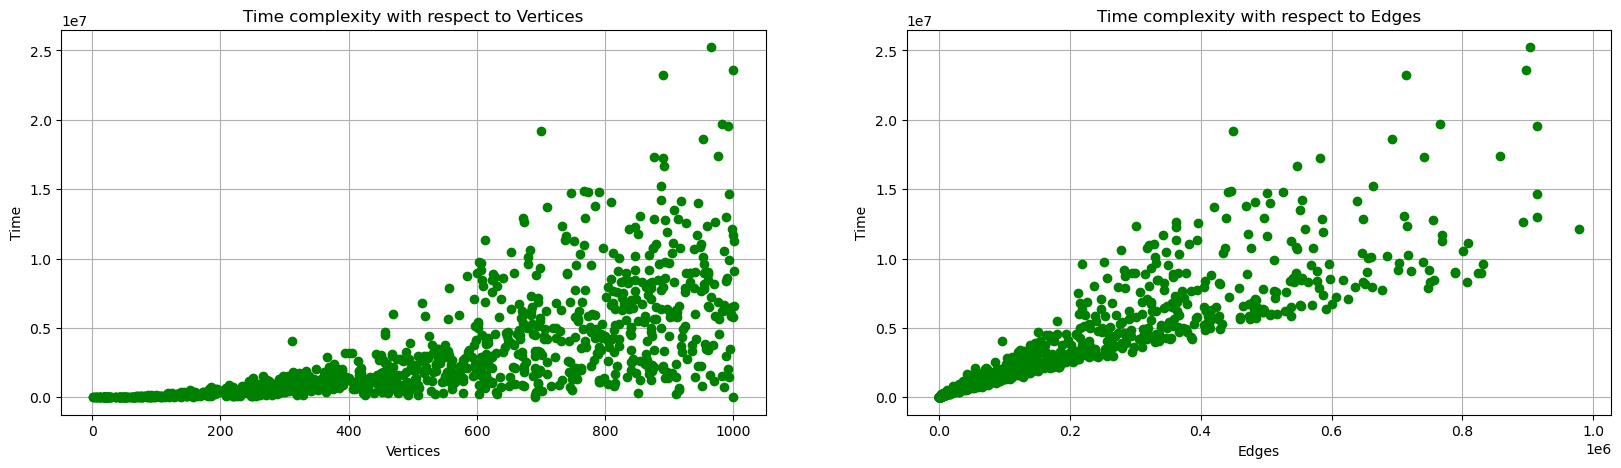

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method2_df_dense['Vertices'], method2_df_dense['Time Array (Method 2)'], 'o', color='g')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method2_df_dense['Edges'], method2_df_dense['Time Array (Method 2)'], 'o', color='g')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.show()

###### Fit a line to the graph

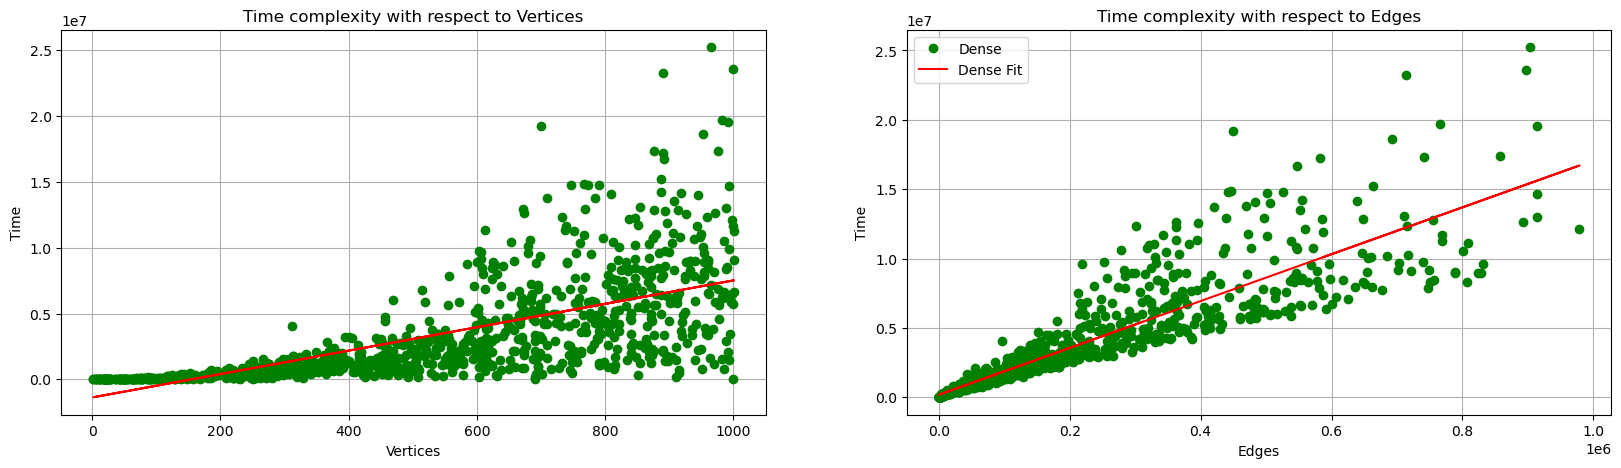

In [20]:
dense_fit_vertices2 = np.polyfit(method2_df_dense['Vertices'], method2_df_dense['Time Array (Method 2)'], 1)
dense_fit_edges2 = np.polyfit(method2_df_dense['Edges'], method2_df_dense['Time Array (Method 2)'], 1)

# Define the fitted line equations
dense_line_vertices2 = np.polyval(dense_fit_vertices2, method2_df_dense['Vertices'])
dense_line_edges2 = np.polyval(dense_fit_edges2, method2_df_dense['Edges'])

fig, ax = plt.subplots(1,2, figsize=(20, 5))

# Plot for Vertices
ax[0].plot(method2_df_dense['Vertices'], method2_df_dense['Time Array (Method 2)'], 'o', color='g', label='Dense')
ax[0].plot(method2_df_dense['Vertices'], dense_line_vertices2, '-', color='r', label='Dense Fit')
ax[0].set_title('Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

# Plot for Edges
ax[1].plot(method2_df_dense['Edges'], method2_df_dense['Time Array (Method 2)'], 'o', color='g', label='Dense')
ax[1].plot(method2_df_dense['Edges'], dense_line_edges2, '-', color='r', label='Dense Fit')
ax[1].set_title('Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.legend()
plt.show()

#### SPARSE and Dense Combined

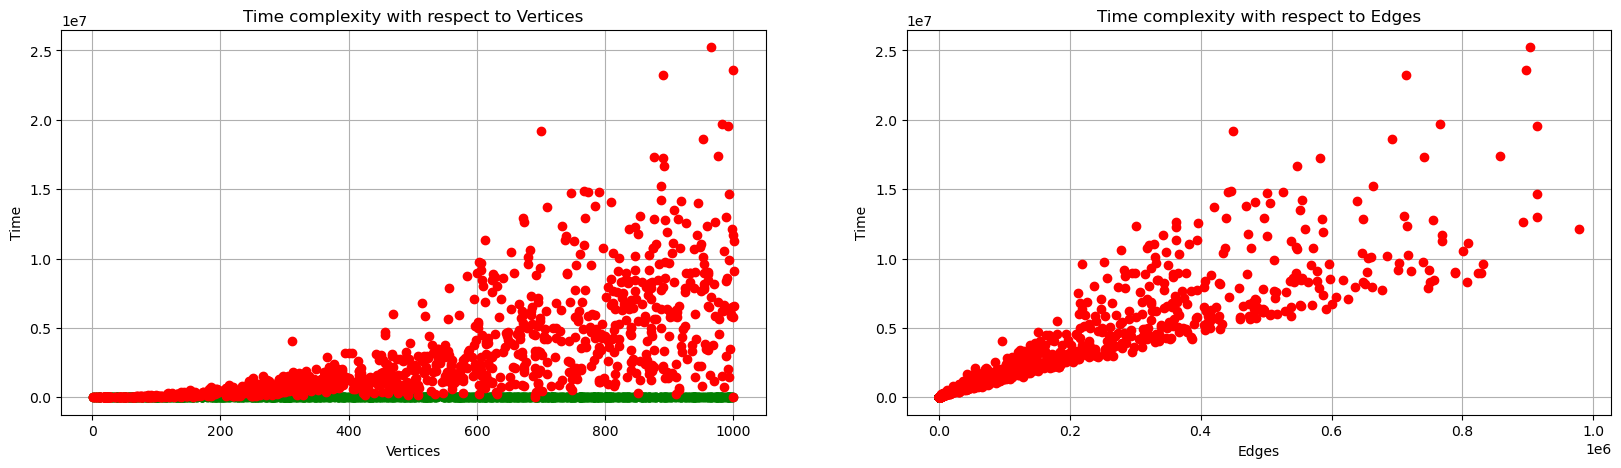

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method2_df_SPARSE['Vertices'], method2_df_SPARSE['Time Array (Method 2)'], 'o', color='g')
ax[0].plot(method2_df_dense['Vertices'], method2_df_dense['Time Array (Method 2)'], 'o', color='r')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method2_df_SPARSE['Edges'], method2_df_SPARSE['Time Array (Method 2)'], 'o', color='g')
ax[1].plot(method2_df_dense['Edges'], method2_df_dense['Time Array (Method 2)'], 'o', color='r')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.show()

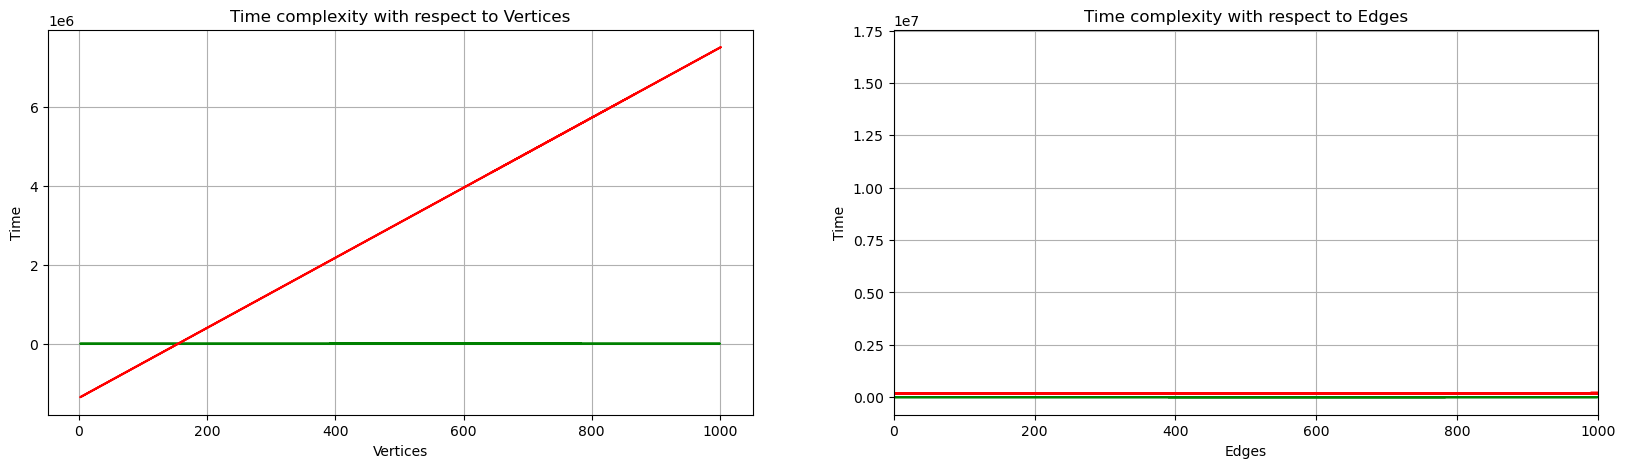

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method2_df_SPARSE_filtered['Vertices'], sparse_line_vertices2, '-', color='g', label='Sparse Fit')
ax[0].plot(method2_df_dense['Vertices'], dense_line_vertices2, '-', color='r', label='Dense Fit')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method2_df_SPARSE_filtered['Edges'], sparse_line_edges2, '-', color='g', label='Sparse Fit')
ax[1].plot(method2_df_dense['Edges'], dense_line_edges2, '-', color='r', label='Dense Fit')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

#set x range to see differences in Edges graph
plt.xlim([0,1000])
plt.show()

# Comparing with Theoretical Result (Vertices)
1. Plot graph of theoretical results for method 1 (Adjacency Matrix + Array)
2. Plot graph of theoretical results for method 2 (Adjacency List + Heap)
3. Plot combined graph and compare

###### 1. Plot graph of theoretical results for method 1 (Adjacency Matrix + Array) : V^2

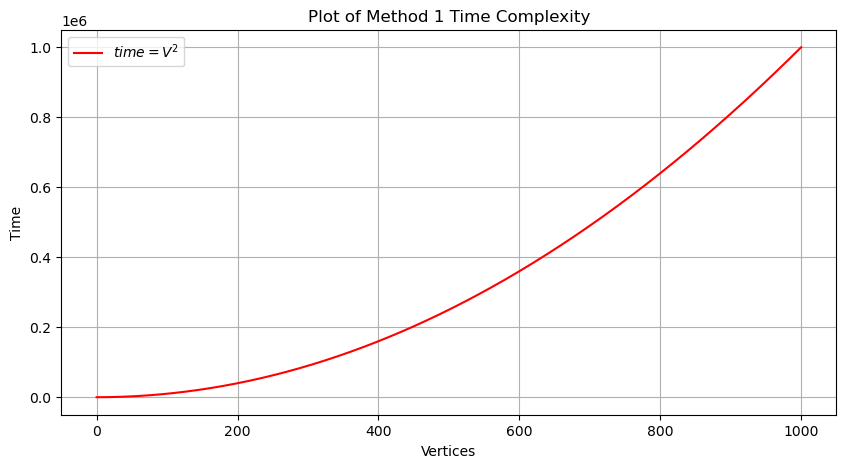

In [23]:
v1 = np.linspace(0, 1000, 500)  # Values of v from 0 to 100

time1 = v1 ** 2

# Plot v with respect to time
plt.figure(figsize=(10, 5))
plt.plot(v1, time1, label=r'$time = V^2$', color='r')
plt.title('Plot of Method 1 Time Complexity')
plt.xlabel('Vertices')
plt.ylabel('Time')
plt.grid(True)
plt.legend()
plt.show()


###### 2. Plot graph of theoretical results for method 1 (Adjacency List + Heap) : (V+E)*lgV

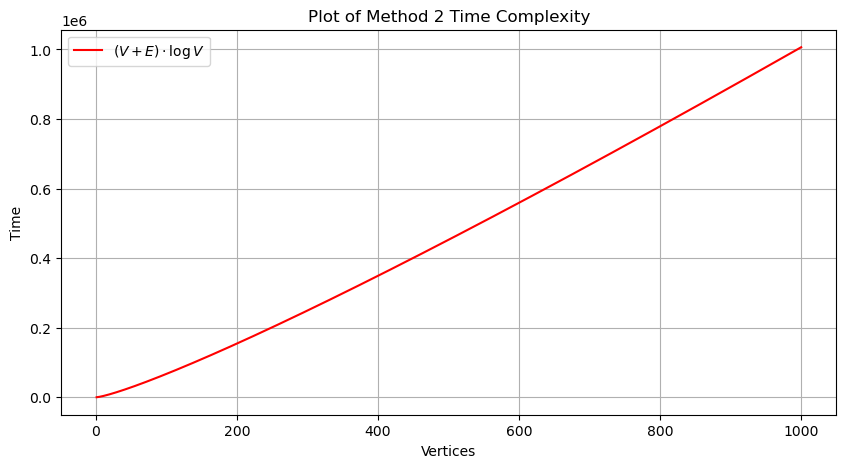

In [32]:
c = 100  # Assume E = c * V, where c is a constant
v2 = np.linspace(1, 1000, 500) 
E2 = c * v2 # Calculate E = c * V (edges proportional to vertices)

time2 = (v2 + E2) * np.log2(v2)

# Plot V with respect to time
plt.figure(figsize=(10, 5))
plt.plot(v2, time2, label=r'$(V + E) \cdot \log V$', color='r')
plt.title('Plot of Method 2 Time Complexity')
plt.xlabel('Vertices')
plt.ylabel('Time')
plt.grid(True)
plt.legend()
plt.show()

###### 3. Plot combined graph and compare

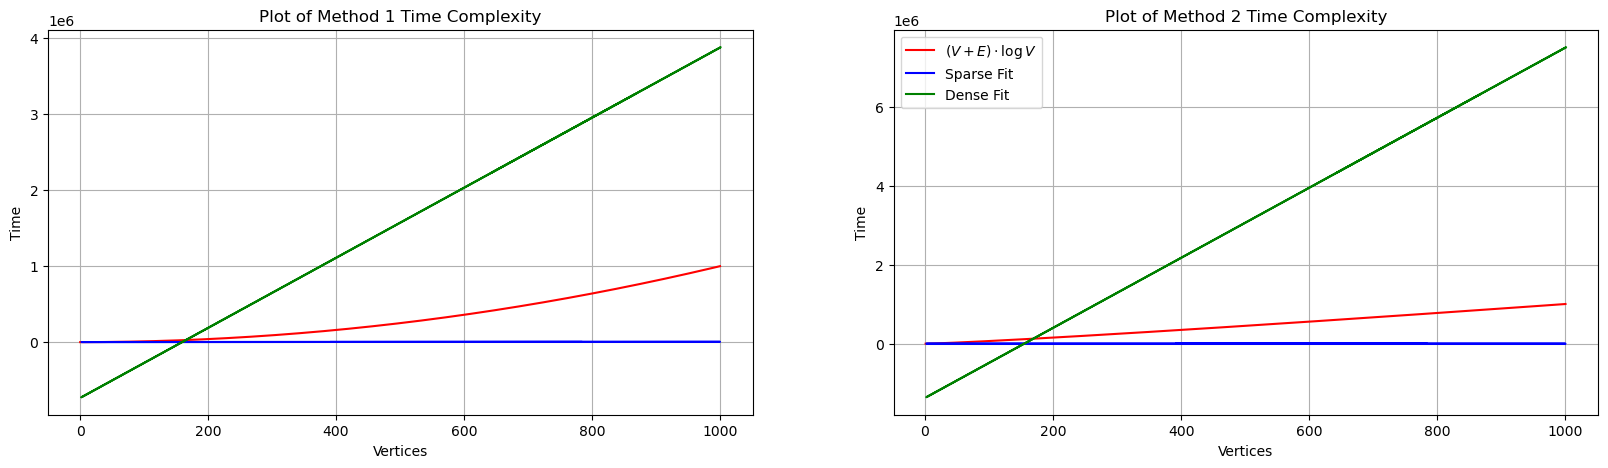

In [33]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))

# Plot for method 1
ax[0].plot(v1, time1, label=r'$time = V^2$', color='r')
ax[0].plot(method1_df_SPARSE_filtered['Vertices'], sparse_line_vertices1, '-', color='b', label='Sparse Fit')
ax[0].plot(method1_df_dense['Vertices'], dense_line_vertices1, '-', color='g', label='Dense Fit')
ax[0].set_title('Plot of Method 1 Time Complexity')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

# Plot for method 2
ax[1].plot(v2, time2, label=r'$(V + E) \cdot \log V$', color='r')
ax[1].plot(method2_df_SPARSE_filtered['Vertices'], sparse_line_vertices2, '-', color='b', label='Sparse Fit')
ax[1].plot(method2_df_dense['Vertices'], dense_line_vertices2, '-', color='g', label='Dense Fit')
ax[1].set_title('Plot of Method 2 Time Complexity')
ax[1].set_xlabel('Vertices')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.legend()
plt.show()

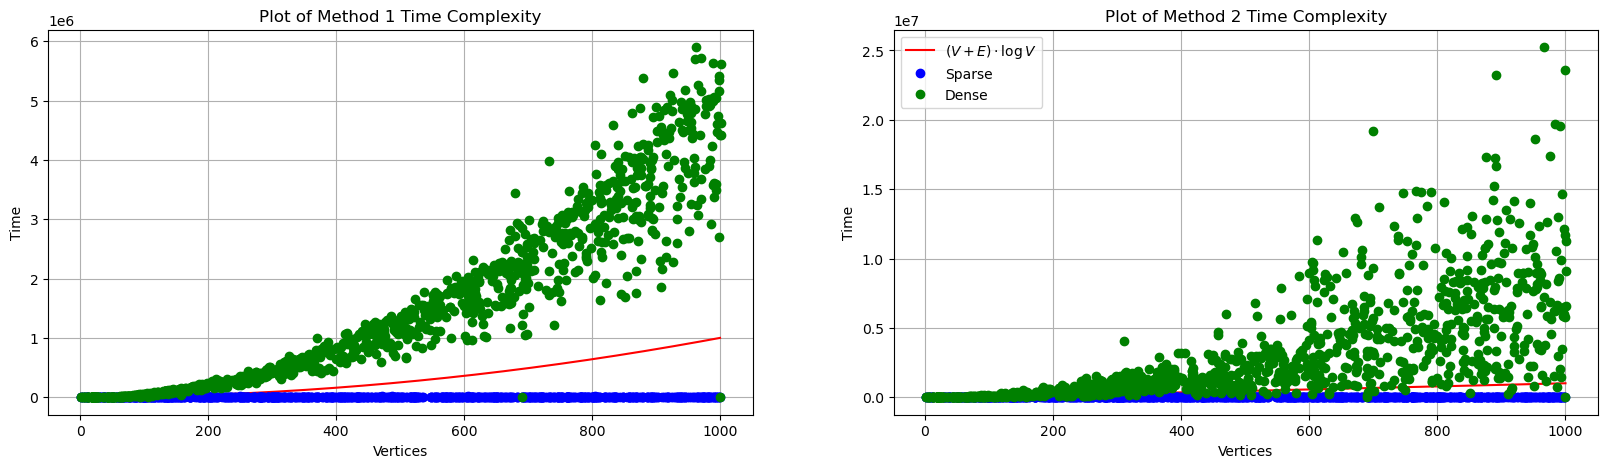

In [34]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))

# Plot for method 1
ax[0].plot(v1, time1, label=r'$time = V^2$', color='r')
ax[0].plot(method1_df_SPARSE_filtered['Vertices'], method1_df_SPARSE_filtered['Time Array (Method 1)'], 'o', color='b', label='Sparse')
ax[0].plot(method1_df_dense['Vertices'], method1_df_dense['Time Array (Method 1)'], 'o', color='g')
ax[0].set_title('Plot of Method 1 Time Complexity')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

# Plot for method 2
ax[1].plot(v2, time2, label=r'$(V + E) \cdot \log V$', color='r')
ax[1].plot(method2_df_SPARSE_filtered['Vertices'], method2_df_SPARSE_filtered['Time Array (Method 2)'], 'o', color='b', label='Sparse')
ax[1].plot(method2_df_dense['Vertices'], method2_df_dense['Time Array (Method 2)'], 'o', color='g',label = 'Dense')
ax[1].set_title('Plot of Method 2 Time Complexity')
ax[1].set_xlabel('Vertices')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.legend()
plt.show()

Performance of method 1 and 2 under sparse and dense graph

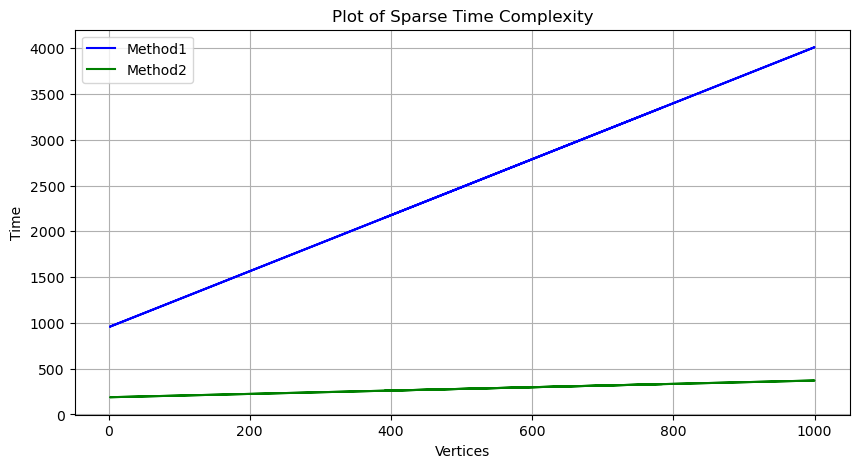

In [36]:
# Plot for Sparse (Vertices)
plt.figure(figsize = (10,5))
plt.plot(method1_df_SPARSE_filtered['Vertices'], sparse_line_vertices1, '-', color='b', label='Method1')
plt.plot(method2_df_SPARSE_filtered['Vertices'], sparse_line_vertices2, '-', color='g', label='Method2')
plt.title('Plot of Sparse Time Complexity')
plt.xlabel('Vertices')
plt.ylabel('Time')
plt.grid(True)

plt.legend()
plt.show()

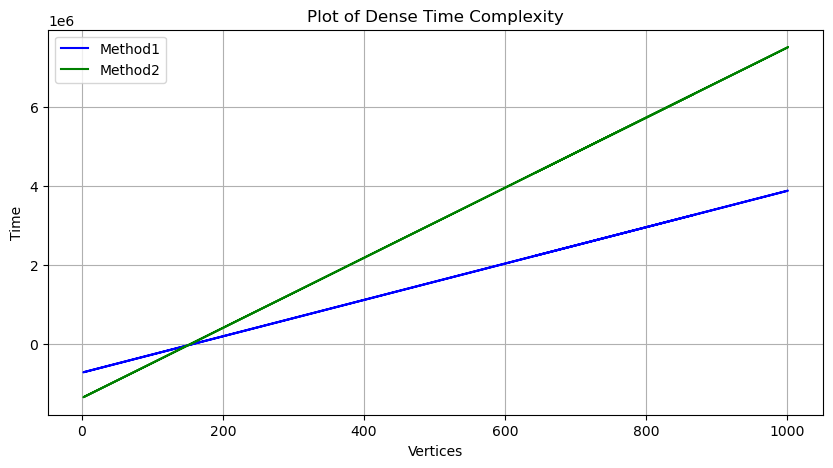

In [37]:
# Plot for Dense (Vertices)
plt.figure(figsize = (10,5))
plt.plot(method1_df_dense['Vertices'], dense_line_vertices1, '-', color='b', label='Method1')
plt.plot(method2_df_dense['Vertices'], dense_line_vertices2, '-', color='g', label='Method2')
plt.title('Plot of Dense Time Complexity')
plt.xlabel('Vertices')
plt.ylabel('Time')
plt.grid(True)

plt.legend()
plt.show()

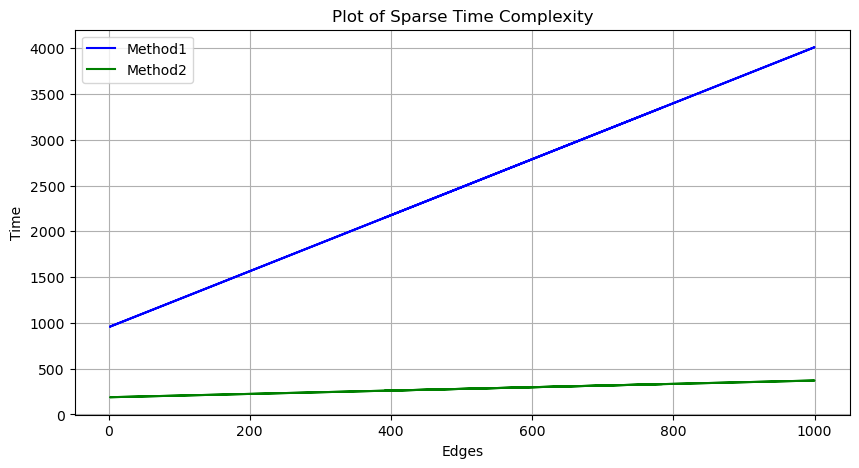

In [38]:
# Plot for Sparse (Edges)
plt.figure(figsize = (10,5))
plt.plot(method1_df_SPARSE_filtered['Vertices'], sparse_line_edges1, '-', color='b', label='Method1')
plt.plot(method2_df_SPARSE_filtered['Vertices'], sparse_line_edges2, '-', color='g', label='Method2')
plt.title('Plot of Sparse Time Complexity')
plt.xlabel('Edges')
plt.ylabel('Time')
plt.grid(True)

plt.legend()
plt.show()

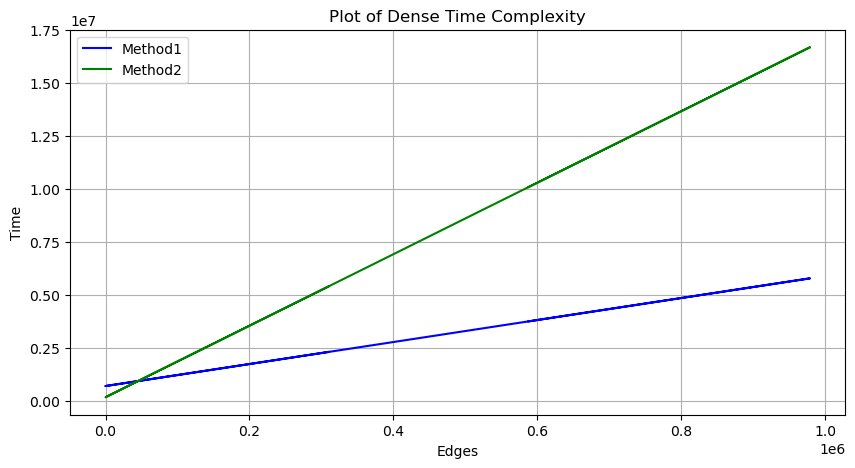

In [39]:
# Plot for Dense (Edges)
plt.figure(figsize = (10,5))
plt.plot(method1_df_dense['Edges'], dense_line_edges1, '-', color='b', label='Method1')
plt.plot(method2_df_dense['Edges'], dense_line_edges2, '-', color='g', label='Method2')
plt.title('Plot of Dense Time Complexity')
plt.xlabel('Edges')
plt.ylabel('Time')
plt.grid(True)

plt.legend()
plt.show()